# Feature Engineering and Modelling

---

1. Import packages
2. Load data
3. Modelling

---

## 1. Import packages

In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

---
## 2. Load data

In [3]:
df = pd.read_csv('data/data_for_predictions.csv')
df.drop(columns=["Unnamed: 0"], inplace=True)
df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,0.000000,0.0,0.444045,0.114481,0.098142,40.606701,...,2,6,0,0,1,0,0,0,0,1
1,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2.280920,0.0,1.237292,0.145711,0.000000,44.311378,...,76,4,1,0,0,0,0,1,0,0
2,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,1.689841,0.0,1.599009,0.165794,0.087899,44.311378,...,68,8,0,0,1,0,0,1,0,0
3,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2.382089,0.0,1.318689,0.146694,0.000000,44.311378,...,69,9,0,0,0,1,0,1,0,0
4,149d57cf92fc41cf94415803a877cb4b,3.646011,0.000000,2.721811,2.650065,0.0,2.122969,0.116900,0.100015,40.606701,...,71,9,1,0,0,0,0,1,0,0


---

## 3. Modelling

We now have a dataset containing features that we have engineered and we are ready to start training a predictive model. Remember, we only need to focus on training a `Random Forest` classifier.

In [4]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import make_pipeline

### Data sampling

The first thing we want to do is split our dataset into training and test samples. The reason why we do this, is so that we can simulate a real life situation by generating predictions for our test sample, without showing the predictive model these data points. This gives us the ability to see how well our model is able to generalise to new data, which is critical.

A typical % to dedicate to testing is between 20-30, for this example we will use a 75-25% split between train and test respectively.

In [5]:
# Make a copy of our data
train_df = df.copy()

# Separate target variable from independent variables
y = df['churn']
X = df.drop(columns=['id', 'churn'])
print(X.shape)
print(y.shape)

(14606, 61)
(14606,)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10954, 61)
(10954,)
(3652, 61)
(3652,)


### Model training

Once again, we are using a `Random Forest` classifier in this example. A Random Forest sits within the category of `ensemble` algorithms because internally the `Forest` refers to a collection of `Decision Trees` which are tree-based learning algorithms. As the data scientist, you can control how large the forest is (that is, how many decision trees you want to include).

The reason why an `ensemble` algorithm is powerful is because of the laws of averaging, weak learners and the central limit theorem. If we take a single decision tree and give it a sample of data and some parameters, it will learn patterns from the data. It may be overfit or it may be underfit, but that is now our only hope, that single algorithm. 

With `ensemble` methods, instead of banking on 1 single trained model, we can train 1000's of decision trees, all using different splits of the data and learning different patterns. It would be like asking 1000 people to all learn how to code. You would end up with 1000 people with different answers, methods and styles! The weak learner notion applies here too, it has been found that if you train your learners not to overfit, but to learn weak patterns within the data and you have a lot of these weak learners, together they come together to form a highly predictive pool of knowledge! This is a real life application of many brains are better than 1.

Now instead of relying on 1 single decision tree for prediction, the random forest puts it to the overall views of the entire collection of decision trees. Some ensemble algorithms using a voting approach to decide which prediction is best, others using averaging. 

As we increase the number of learners, the idea is that the random forest's performance should converge to its best possible solution.

Some additional advantages of the random forest classifier include:

- The random forest uses a rule-based approach instead of a distance calculation and so features do not need to be scaled
- It is able to handle non-linear parameters better than linear based models

On the flip side, some disadvantages of the random forest classifier include:

- The computational power needed to train a random forest on a large dataset is high, since we need to build a whole ensemble of estimators.
- Training time can be longer due to the increased complexity and size of thee ensemble

#### Preprocessing
Feature types: 
- Binary: `has_gas`
- Categorical: `channel`, `origin_up`
- Target: `churn`
- Numeric: All other variables provided

In scenario where data wasn't preprocessed before, can use `make_column_transformer()` from `sklearn.preprocessing`.
- `StandardScaler()` to standardise all numeric variables.
- For all non-numeric variables, use the provided method to forcibly convert all of them to categorical; can be applied to start of their pipelines.
    - https://stackoverflow.com/questions/59476179/is-it-possible-to-change-pandas-column-data-type-within-a-sklearn-pipeline
- For ordinal variables, use `OrdinalEncoder(categories=<ORDER>)` with given `<ORDER>` as list or list of lists.
- For categorical variables, use `OneHotEncoder()` for automatic encoding in pipeline.
    - For binary variables, use `OneHotEncoder(..., drop = "if_binary")` to ensure that there are no redundant columns.

In [7]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10954 entries, 11674 to 7270
Data columns (total 61 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   cons_12m                                    10954 non-null  float64
 1   cons_gas_12m                                10954 non-null  float64
 2   cons_last_month                             10954 non-null  float64
 3   forecast_cons_12m                           10954 non-null  float64
 4   forecast_discount_energy                    10954 non-null  float64
 5   forecast_meter_rent_12m                     10954 non-null  float64
 6   forecast_price_energy_off_peak              10954 non-null  float64
 7   forecast_price_energy_peak                  10954 non-null  float64
 8   forecast_price_pow_off_peak                 10954 non-null  float64
 9   has_gas                                     10954 non-null  int64  
 10  imp_cons    

In [8]:
# Convert categorical column data type to string  
from sklearn.preprocessing import FunctionTransformer 
# from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
# https://stackoverflow.com/questions/59476179/is-it-possible-to-change-pandas-column-data-type-within-a-sklearn-pipeline
def to_categorical(x): 
    return pd.DataFrame(x).astype("string")
fun_tr = FunctionTransformer(to_categorical)

#### Initial training
- `mean_std_cross_val_scores()` provided to assist in training and evaluation of model

In [9]:
# Obtained from CPSC 330 Lecture 3 
def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    """
    Returns mean and std of cross validation

    Parameters
    ----------
    model :
        scikit-learn model
    X_train : numpy array or pandas DataFrame
        X in the training data
    y_train :
        y in the training data

    Returns
    ----------
        pandas Series with mean scores from cross_validation
    """

    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))

    return pd.Series(data=out_col, index=mean_scores.index)

In [10]:
# Adapted from CPSC 330 Lecture 9 
results = {}
scoring_metric = ["accuracy","precision","recall","f1",]  # scoring can be a string, a list, or a dictionary
dummy = DummyClassifier(random_state = 76)
results["Dummy"] = mean_std_cross_val_scores(
    dummy, X_train, y_train, cv = 10, 
    return_train_score = True, scoring = scoring_metric
)
pd.DataFrame(results).T

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
Dummy,0.001 (+/- 0.001),0.004 (+/- 0.002),0.904 (+/- 0.000),0.904 (+/- 0.000),0.000 (+/- 0.000),0.000 (+/- 0.000),0.000 (+/- 0.000),0.000 (+/- 0.000),0.000 (+/- 0.000),0.000 (+/- 0.000)


In [11]:
# Add model training in here!

# Random forest 
# Hyperparameters: n_estimators, max_depth, max_features

model = RandomForestClassifier(n_jobs=-1, random_state=76,) # Add parameters to the model!

# model.fit(X_train, y_train) # Complete this method call!
results["Random forest"] = mean_std_cross_val_scores(
    model, X_train, y_train, cv = 10, return_train_score = True, scoring=scoring_metric
)

### Hyperparameter optimisation
- Given parameter grid `param_grid_rf`, used `RandomizedSearchCV()` to optimise the `RandomForestClassifier` based on f1-score.
- Best parameters are obtained, then applied into an optimised model
- f1-score used due to imbalance of `churn`, so using it as a metric of measurement mitigates the issue of class imbalance.
- From the initial model to the optimised model, the optimised model has lower test accuracy and precision, and greater test recall and f1-score.

In [12]:
# Random forest 
# Hyperparameters: n_estimators, max_depth, max_features, class_weight
param_grid_rf = {
    "max_depth": np.arange(1, 30, 4), 
    "n_estimators": [100, 200, 300, 400, 500], 
    "max_features": [5, 10, 15, 20, 25, 30, 35, 40, 45, 50], 
    "class_weight": [{0: 1, 1: x} for x in [0.33, 0.5, 1, 3, 5, 7, 9]],
}
random_search_rf = RandomizedSearchCV(
    model, param_distributions = param_grid_rf, n_iter=10,
    n_jobs = -1, return_train_score = True, random_state = 76, scoring='f1'
)  
random_search_rf.fit(X_train, y_train)

best_params_rf = random_search_rf.best_params_
best_score_rf = random_search_rf.best_score_
print("best_params_rf: " + str(best_params_rf))
print("best_score_rf: " + str(best_score_rf))

model_opt = RandomForestClassifier(
    n_estimators = best_params_rf["n_estimators"], 
    max_depth = best_params_rf["max_depth"], 
    max_features = best_params_rf["max_features"], 
    class_weight = best_params_rf["class_weight"],
    n_jobs=-1, random_state=76,
)


results["Random forest (Optimised)"] = mean_std_cross_val_scores(
    model_opt, X_train, y_train, cv = 10, return_train_score = True, scoring=scoring_metric
)

best_params_rf: {'n_estimators': 100, 'max_features': 45, 'max_depth': 5, 'class_weight': {0: 1, 1: 7}}
best_score_rf: 0.25280343407287487


In [13]:
pd.DataFrame(results).T

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
Dummy,0.001 (+/- 0.001),0.004 (+/- 0.002),0.904 (+/- 0.000),0.904 (+/- 0.000),0.000 (+/- 0.000),0.000 (+/- 0.000),0.000 (+/- 0.000),0.000 (+/- 0.000),0.000 (+/- 0.000),0.000 (+/- 0.000)
Random forest,0.379 (+/- 0.044),0.022 (+/- 0.013),0.909 (+/- 0.003),1.000 (+/- 0.000),0.827 (+/- 0.128),1.000 (+/- 0.000),0.065 (+/- 0.029),0.999 (+/- 0.001),0.119 (+/- 0.048),1.000 (+/- 0.001)
Random forest (Optimised),0.814 (+/- 0.117),0.017 (+/- 0.001),0.786 (+/- 0.013),0.806 (+/- 0.011),0.194 (+/- 0.023),0.251 (+/- 0.011),0.386 (+/- 0.040),0.510 (+/- 0.016),0.258 (+/- 0.028),0.336 (+/- 0.008)


### Evaluation

Now let's evaluate how well this trained model is able to predict the values of the test dataset.
- Mean accuracy of 0.7740963855421686.
- Cross-validation scores relatively low except for accuracy.
- Model generally has very poor precision-recall ratio.
- Model performance is not satisfactory due to low f1-score for all instances.
- Alternative models that could be considered for this classification problem include `LogisticRegression()` `DecisionTreeClassifier()` and `HistGradientBoostingClassifier()`.
- Survival analysis based on the number of days clients remained in the service could also have been considered for classification.

In [14]:
# Generate predictions here!
from sklearn.metrics import PrecisionRecallDisplay

model_opt.fit(X_train, y_train)
model_opt.predict(X_test)
model_opt.score(X_test, y_test)

0.7740963855421686

SUMMARY OF RESULTS


,
fit_time,1.704 (+/- 0.617)
score_time,0.033 (+/- 0.010)
test_accuracy,0.858 (+/- 0.017)
test_precision,0.214 (+/- 0.095)
test_recall,0.153 (+/- 0.063)
test_f1,0.178 (+/- 0.075)
best_model,Random forest (Optimised)
n_estimators,100
max_features,45
max_depth,5


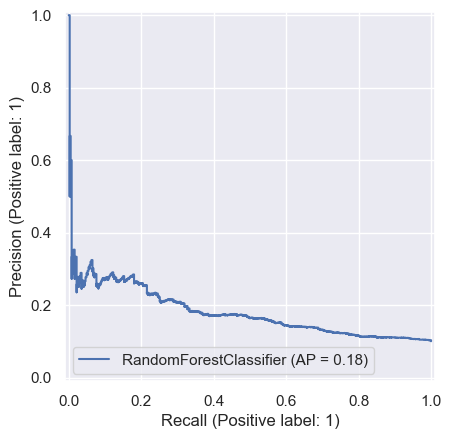

In [15]:
# Calculate performance metrics here!
scores = mean_std_cross_val_scores(model_opt, X_test, y_test, cv=10, scoring=scoring_metric, n_jobs=-1)

scores['best_model'] = 'Random forest (Optimised)'
# convert the dictionary to a Series
best_params_rf_series = pd.Series(best_params_rf)

# concatenate the Series and the dictionary
summary = pd.concat([scores, best_params_rf_series])
print("SUMMARY OF RESULTS")
display(summary.to_frame(''))

# Display of precision and recall
PrecisionRecallDisplay.from_estimator(model_opt, X_test, y_test)

### Feature Importances (Optimised Model)
- Initial `.feature_importances_`
    - `margin_net_pow_ele` and `margin_gross_pow_ele` have extremely high feature importance with at least 0.1 importance
    - Feature importance for `months_activ`, `cons_12m`, `cons_last_month` are relatively high at approximately 0.0375.
    - Two `origin` values `origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws` and `origin_up_lxidpiddsbxsbosboudacockeimpuepw` have particularly high feature importance.
- `permutation_importance`
    - Used to account for feature interactions and bias.
    - `months_to_end`, `months_renewal`, `var_year_price_off_peak`, `margin_net_pow_ele`, `var_year_price_off_peak_fix`, `net_margin`, and `off_peak_peak_var_mean_diff` have particularly strong positive permutation feature importance.
    - `margin_gross_pow_ele` and `months_activ` have particularly strong negative permutation feature importance, along with the two `origin` values `origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws` and `origin_up_lxidpiddsbxsbosboudacockeimpuepw`, which were also provided in `.feature_importances_` graph.
- `margin_net_pow_ele`, `cons_12m`, `cons_last_month` are the only features found in both that may significantly improve the model.

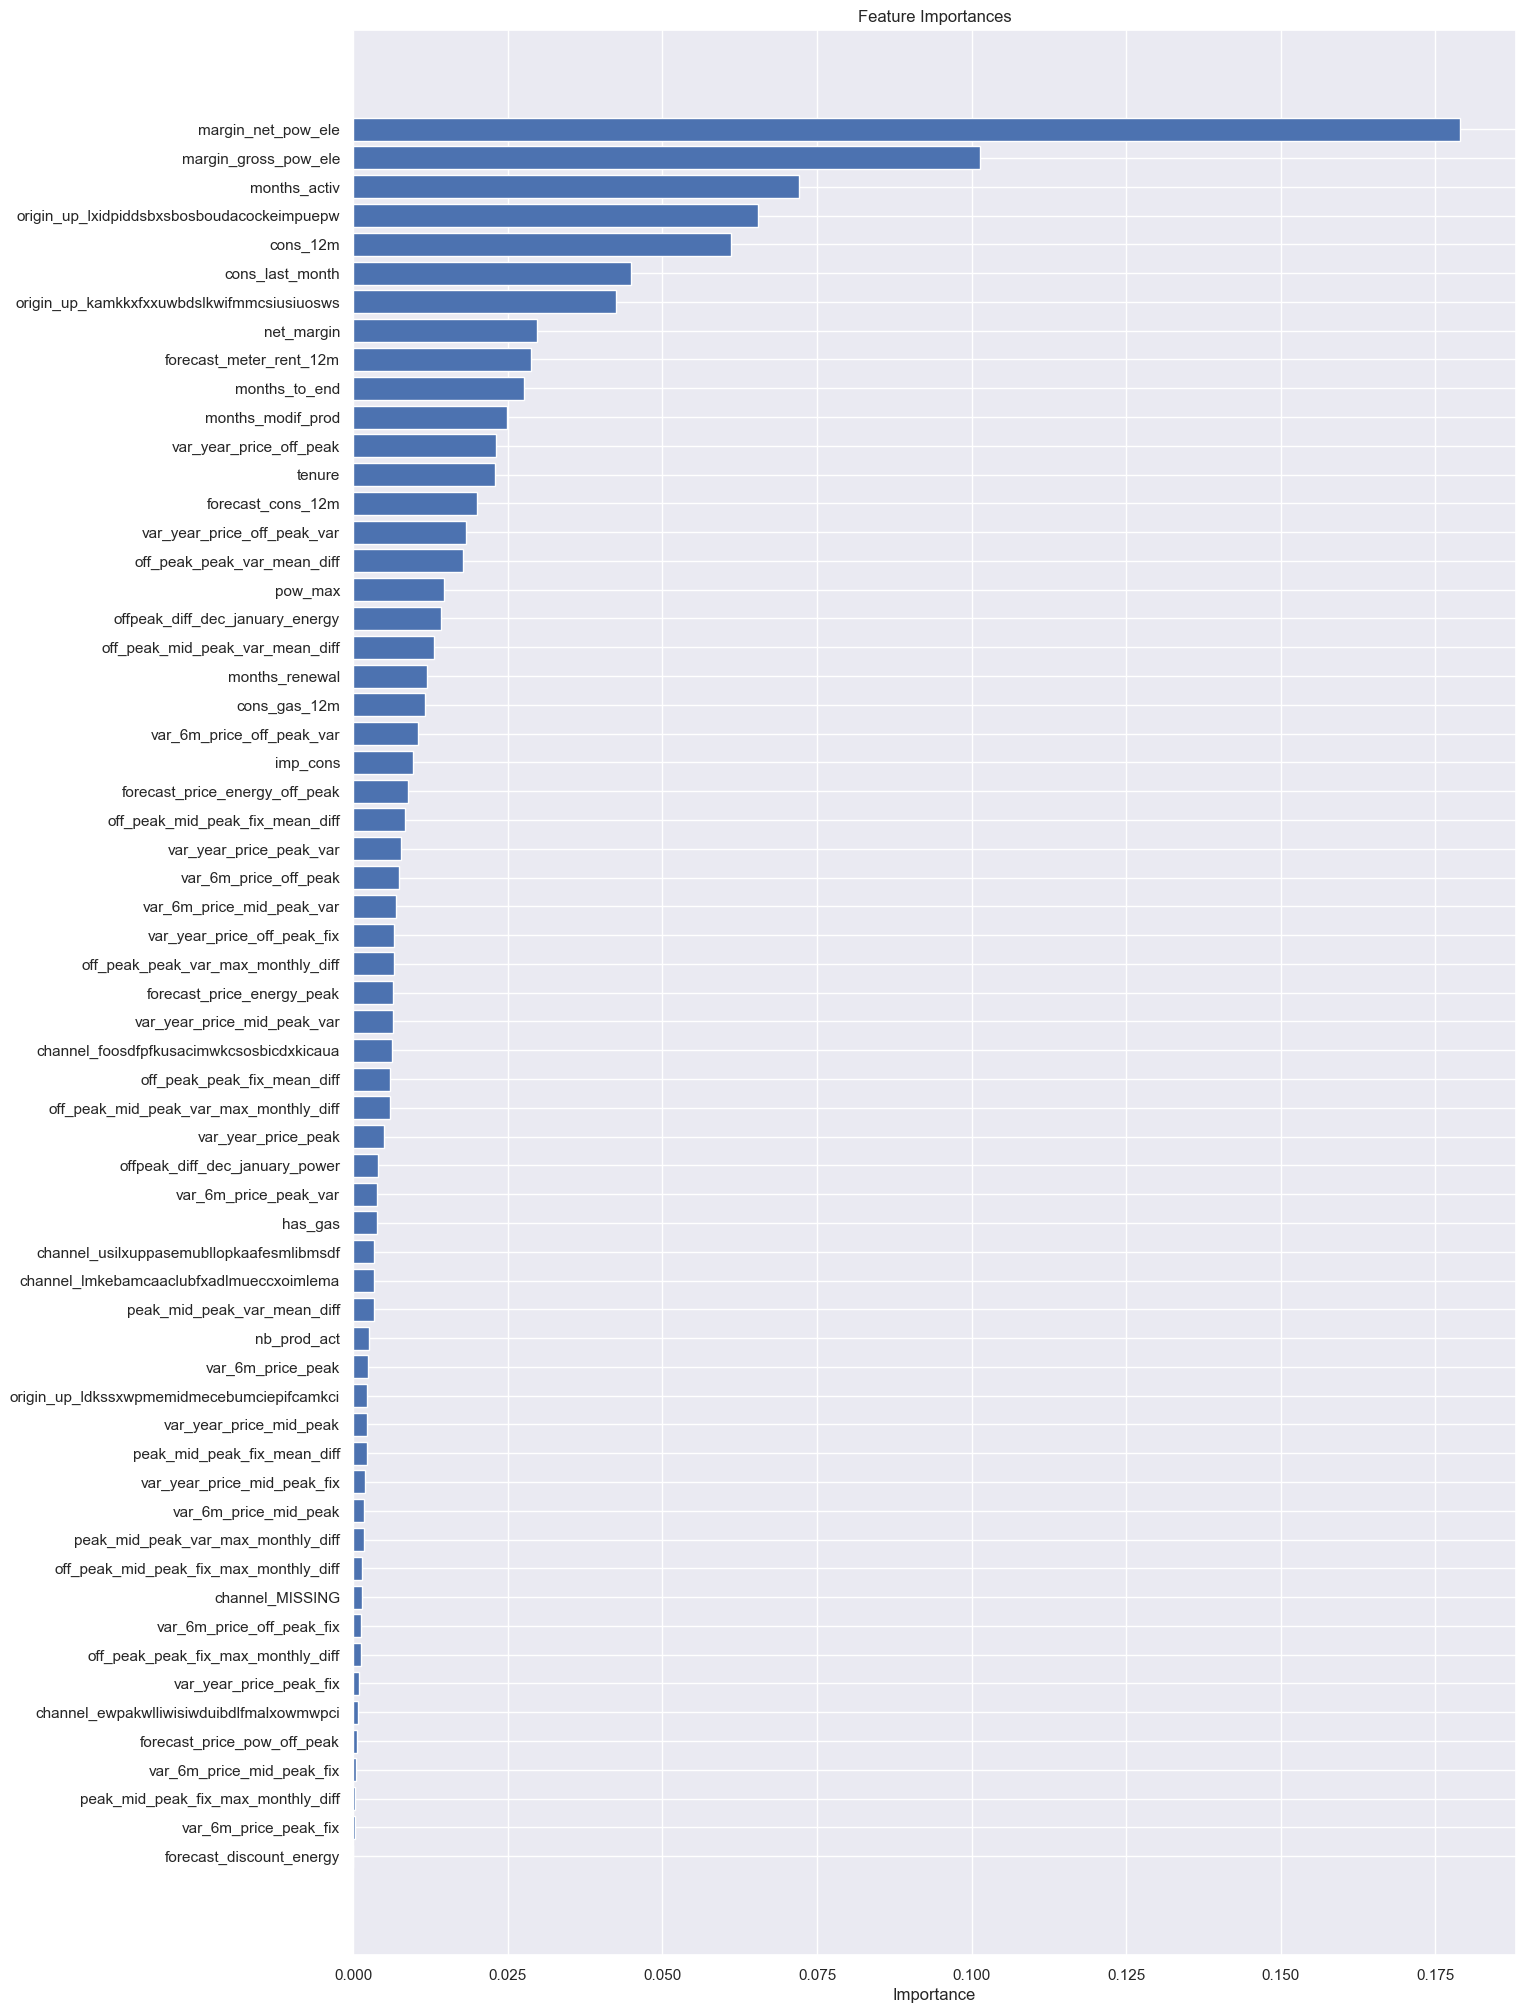

In [16]:
# https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
# importances = model_opt.feature_importances_
# std = np.std([tree.feature_importances_ for tree in model_opt.estimators_], axis=0)
# forest_importances = pd.Series(importances, index=feature_names)

# fig, ax = plt.subplots()
# forest_importances.plot.bar(yerr=std, ax=ax)
# ax.set_title("Feature importances using MDI")
# ax.set_ylabel("Mean decrease in impurity")
# fig.tight_layout()

feature_importances = pd.DataFrame({
    'features': X_train.columns,
    'importance': model_opt.feature_importances_
}).sort_values(by='importance', ascending=True).reset_index()

plt.figure(figsize=(15, 25))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='b', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.show()

In [17]:
from sklearn.inspection import permutation_importance

def get_permutation_importance(model):
    result = permutation_importance(model, X_train, y_train, n_repeats=10, random_state=123)
    perm_sorted_idx = result.importances_mean.argsort()
    plt.boxplot(
        result.importances[perm_sorted_idx].T,
        vert=False,
        labels=X_train.columns[perm_sorted_idx],
    )
    plt.xlabel('Permutation feature importance')
    plt.show()

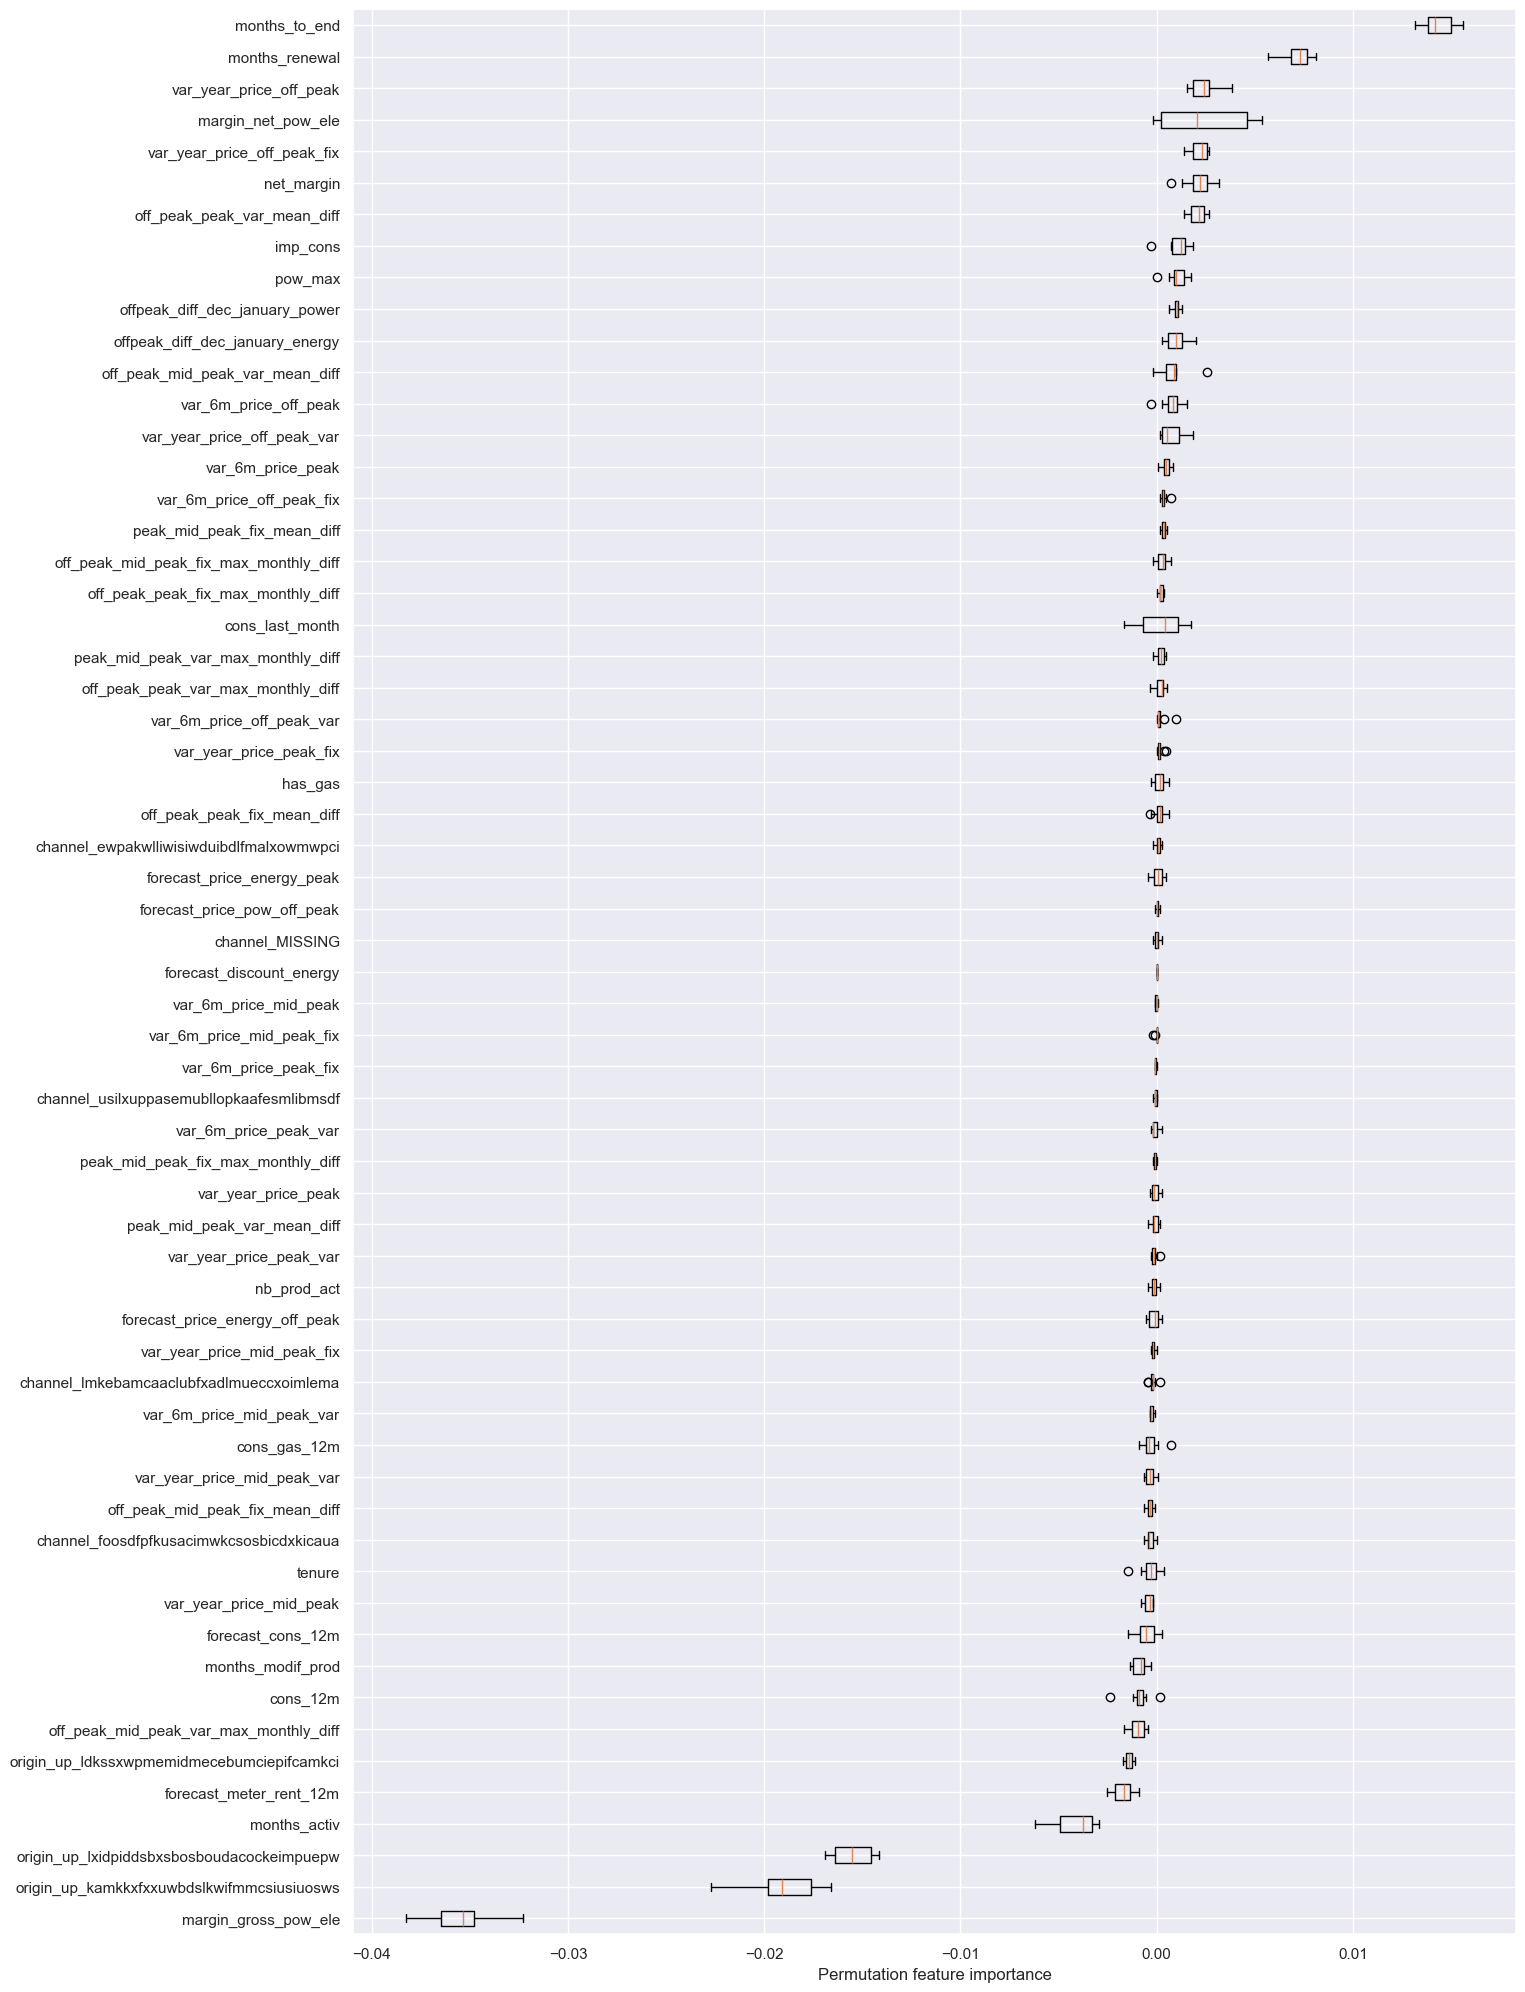

In [18]:
plt.figure(figsize=(15, 25))
get_permutation_importance(model_opt)

### Feature Importances (Regular Model)
- Initial `.feature_importances_`
    - `net_margin`, `cons_12m`, `forecast_meter_rent_12m`, `forecast_cons_12m`, `margin_net_pow_ele` and `margin_gross_pow_ele` have extremely high feature importance with at least 0.04 importance.
- `permutation_importance`
    - Used to account for feature interactions and bias.
    - `margin_net_pow_ele`, `margin_gross_pow_ele`, `origin_up_lxidpiddsbxsbosboudacockeimpuepw`, `months_activ` and `forecast_meter_rent_12m` all have relatively high permutation importance at above 0.015.
- `margin_net_pow_ele`, `margin_gross_pow_ele`, `months_activ` and `forecast_meter_rent_12m` are shared between both feature importance models as particularly important features.

In [19]:
# Generate predictions here!
from sklearn.metrics import PrecisionRecallDisplay

model.fit(X_train, y_train)
model.predict(X_test)
model.score(X_test, y_test)

0.9025191675794085

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


SUMMARY OF RESULTS


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,
fit_time,0.789 (+/- 0.279)
score_time,0.041 (+/- 0.018)
test_accuracy,0.902 (+/- 0.003)
test_precision,0.667 (+/- 0.408)
test_recall,0.027 (+/- 0.019)
test_f1,0.052 (+/- 0.035)
best_model,Random forest


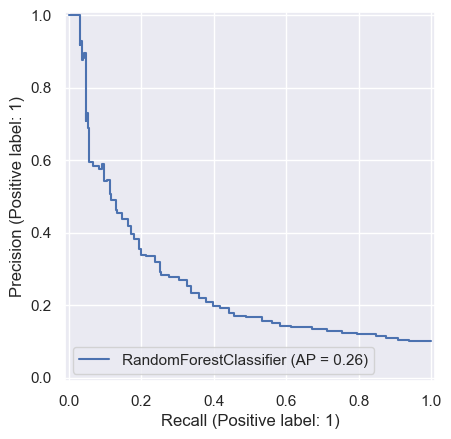

In [20]:
# Calculate performance metrics here!
scores = mean_std_cross_val_scores(model, X_test, y_test, cv=10, scoring=scoring_metric, n_jobs=-1)

scores['best_model'] = 'Random forest'
# convert the dictionary to a Series
best_params_rf_series = pd.Series(best_params_rf)

# concatenate the Series and the dictionary
summary = pd.concat([scores, best_params_rf_series])
print("SUMMARY OF RESULTS")
display(scores.to_frame(''))

# Display of precision and recall
PrecisionRecallDisplay.from_estimator(model, X_test, y_test)

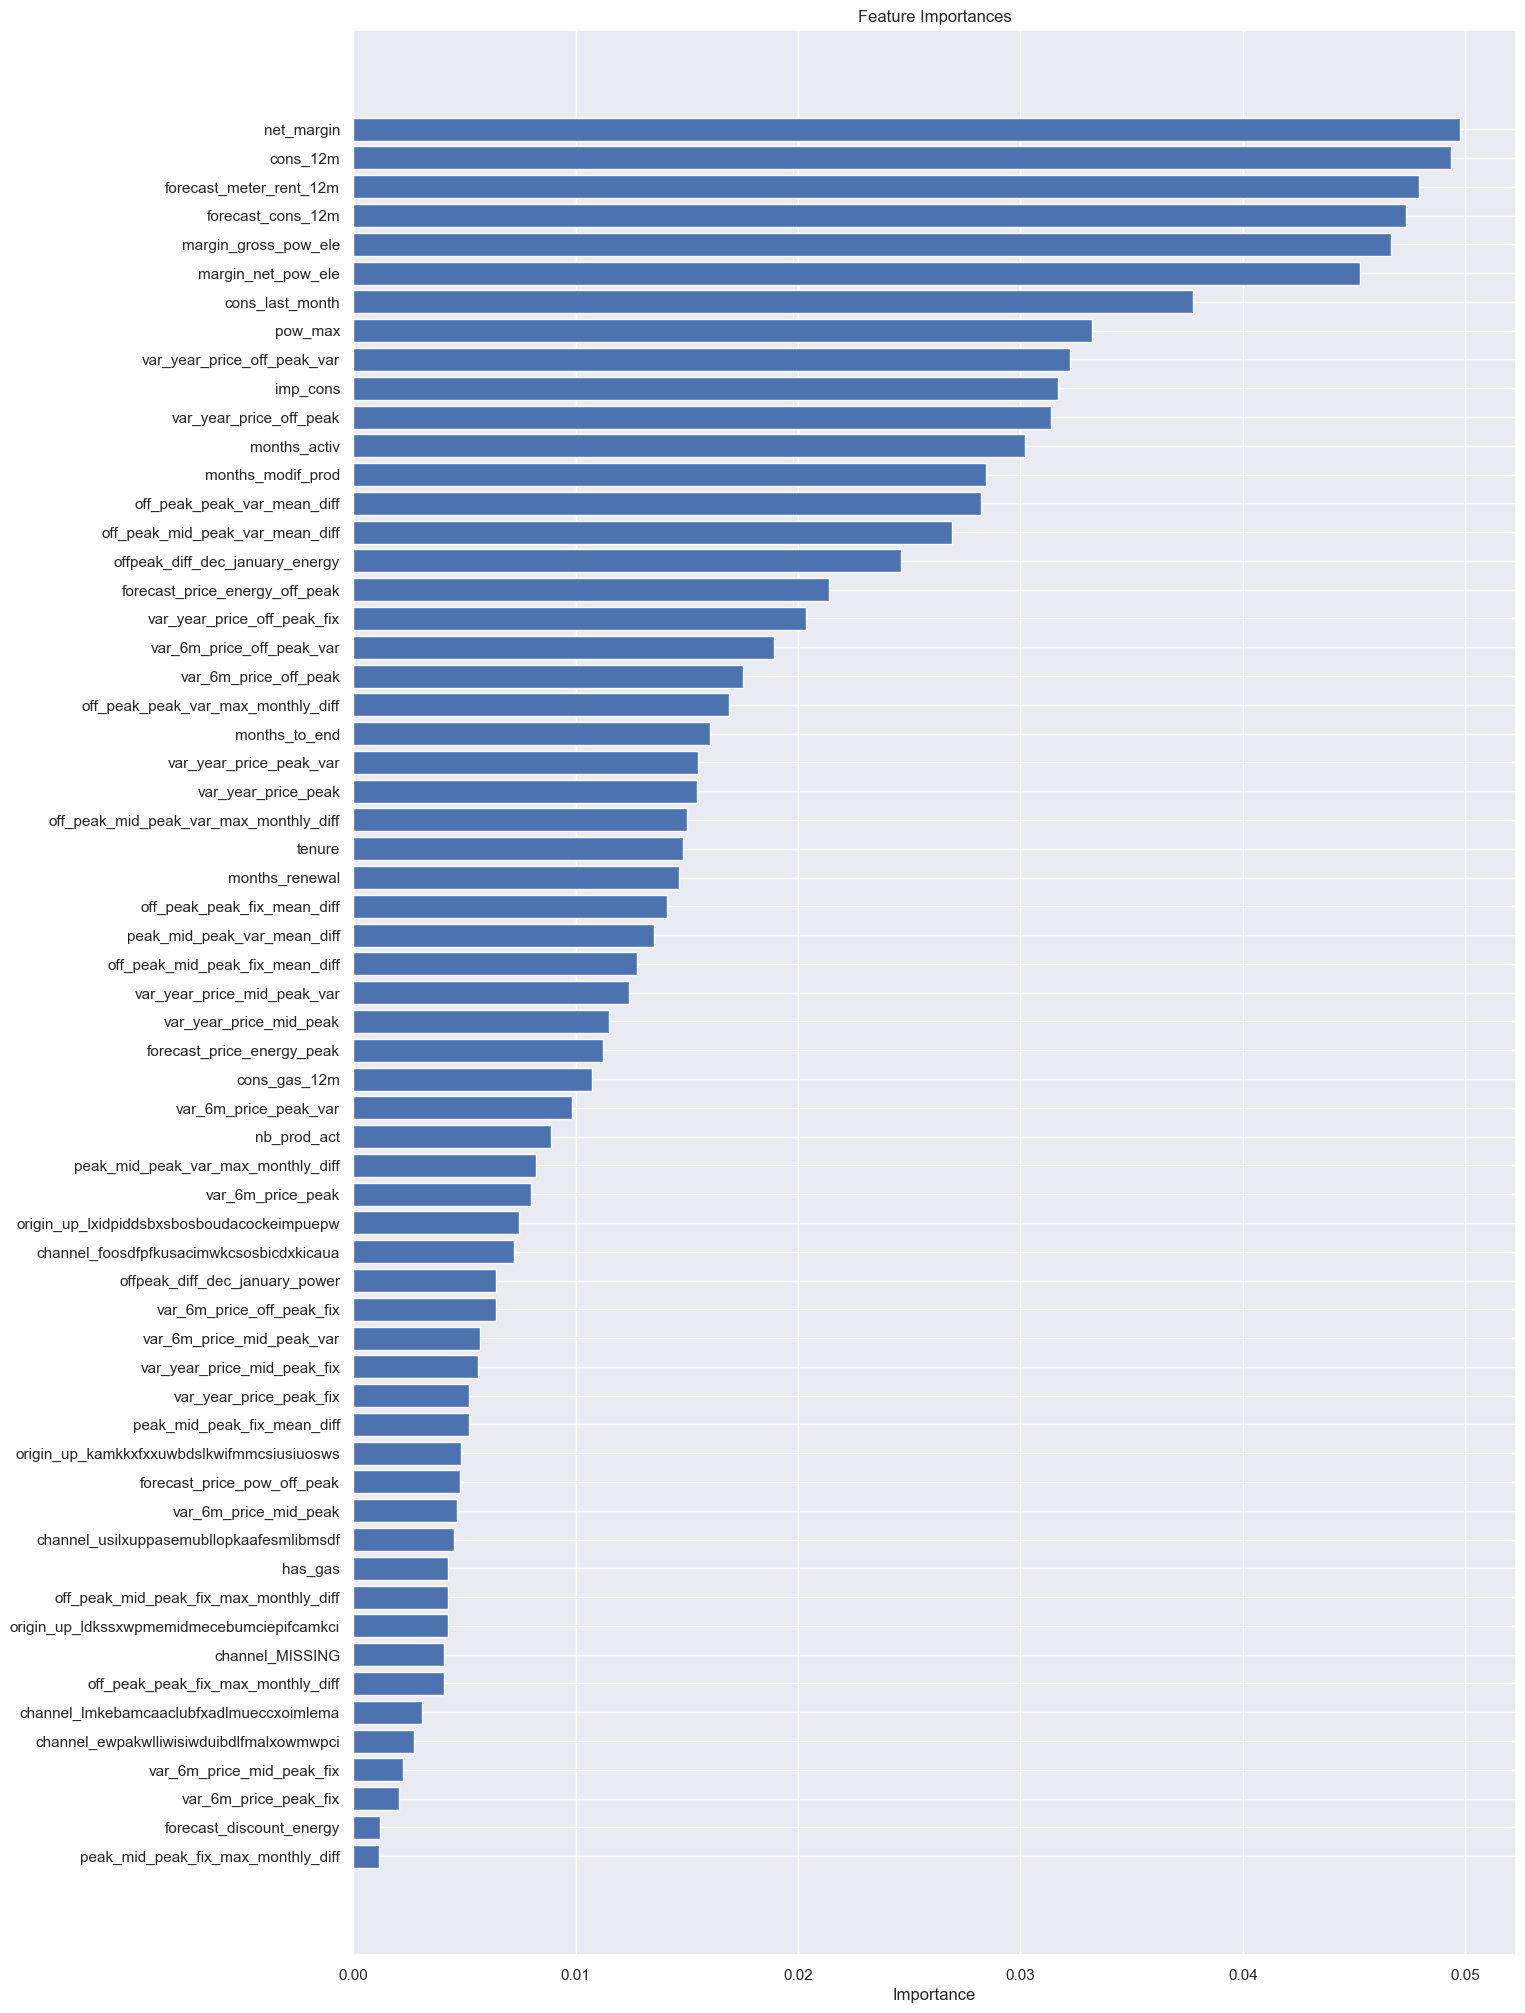

In [21]:
feature_importances = pd.DataFrame({
    'features': X_train.columns,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=True).reset_index()

plt.figure(figsize=(15, 25))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='b', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.show()

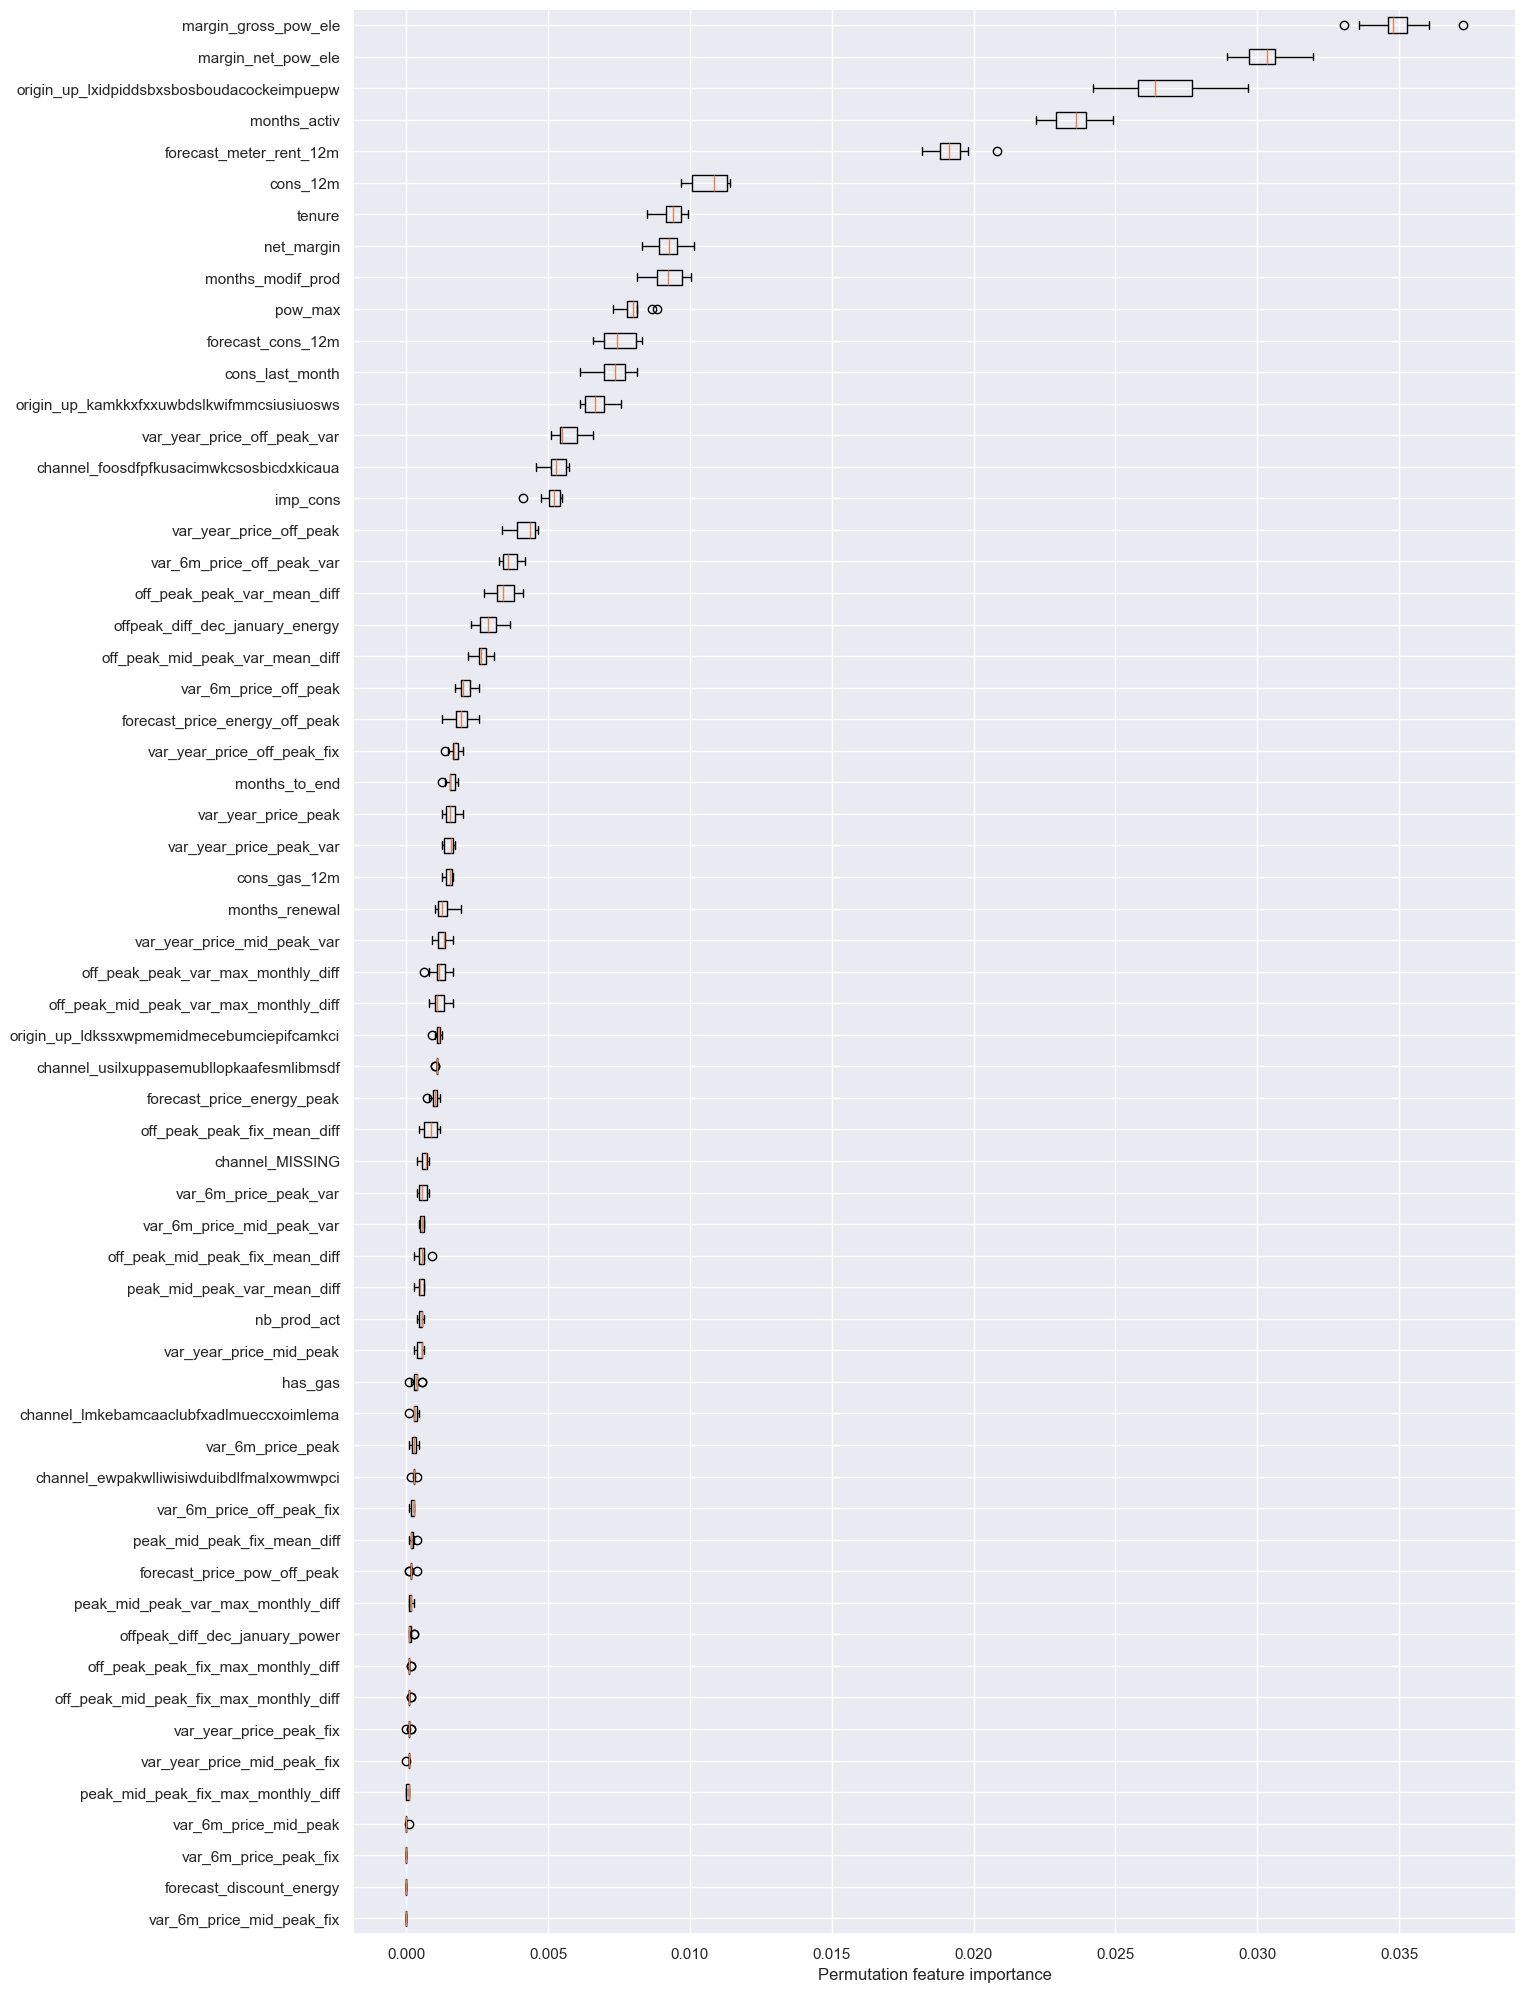

In [22]:
plt.figure(figsize=(15, 25))
get_permutation_importance(model)